<a href="https://colab.research.google.com/github/yachika-yashu/Online-Purchase-Orders-Classification/blob/main/model_selection_evaluation_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# ================== IMPORT LIBRARIES ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, roc_curve, roc_auc_score
import joblib
from sklearn.preprocessing import label_binarize
import seaborn as sns


In [45]:
# ================== 1. LOAD THE DATASET ==================
df = pd.read_parquet("/content/drive/MyDrive/Colab Notebooks/data/cleaned/cleaned_data.csv")

df.head()

,CLASS,B_EMAIL,B_TELEFON,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_LAST_NAME,VALUE_ORDER,WEEKDAY_ORDER,...,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,MAHN_AKT,MAHN_HOECHST,CARD_MONTHS_TO_EXPIRY,MONTHS_SINCE_LAST_ORDER,AGE,AGE_GROUP,ORDER_HOUR,ORDER_PART_OF_DAY
0,no,yes,no,yes,yes,check,not_a_card_payment,not_applicable,17.80,Saturday,...,0,0.00,-1,-1,16,NaN,32.0,25-35,9.0,morning
1,no,yes,yes,no,no,credit_card,Visa,yes,18.20,Wednesday,...,0,0.00,-1,-1,35,NaN,34.0,25-35,17.0,evening
2,no,yes,no,yes,no,check,not_a_card_payment,not_applicable,10.80,Friday,...,0,0.00,-1,-1,35,NaN,32.0,25-35,11.0,morning
3,no,no,yes,yes,no,check,not_a_card_payment,not_applicable,54.50,Friday,...,4,75.72,0,0,24,32.766667,38.0,35-45,2.0,night
4,no,yes,yes,yes,no,credit_card,Eurocard,yes,19.99,Tuesday,...,0,0.00,-1,-1,23,NaN,35.0,25-35,23.0,night


In [46]:

# ==================  2. SEPARATE FEATURES AND TARGET ==================
target_col = 'CLASS'
X = df.drop(columns=[target_col])
le = LabelEncoder()
y = le.fit_transform(df[target_col])

In [47]:
df.dtypes

,0
CLASS,object
B_EMAIL,object
B_TELEFON,object
FLAG_LRIDENTISCH,object
FLAG_NEWSLETTER,object
Z_METHODE,object
Z_CARD_ART,object
Z_LAST_NAME,object
VALUE_ORDER,float64
WEEKDAY_ORDER,object


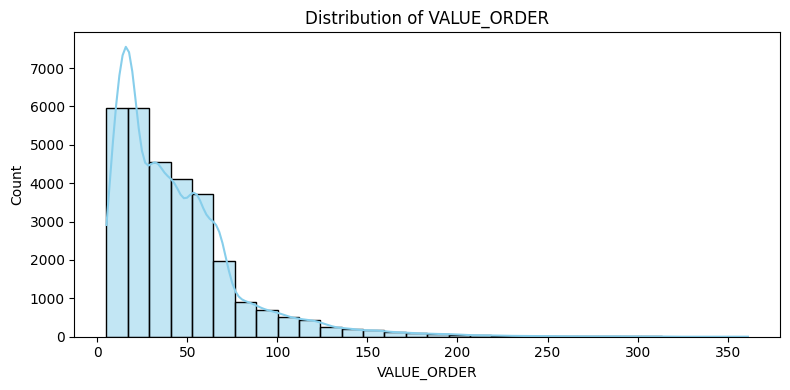

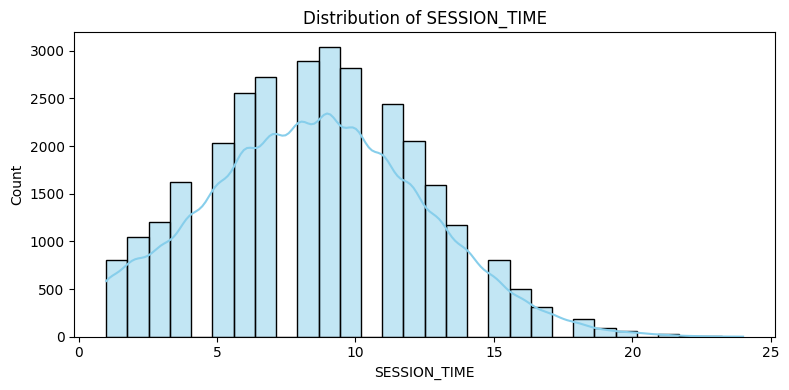

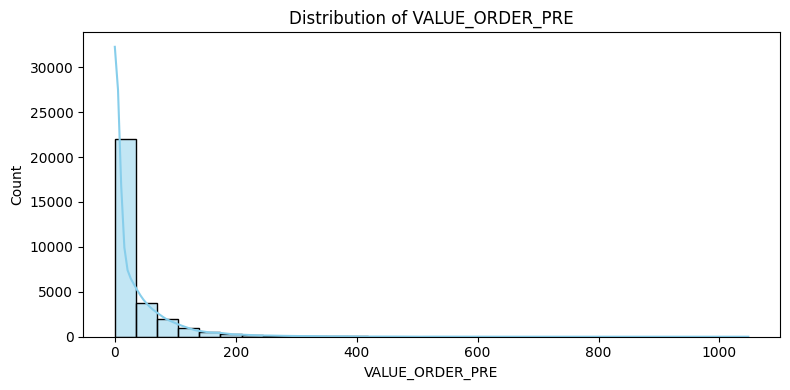

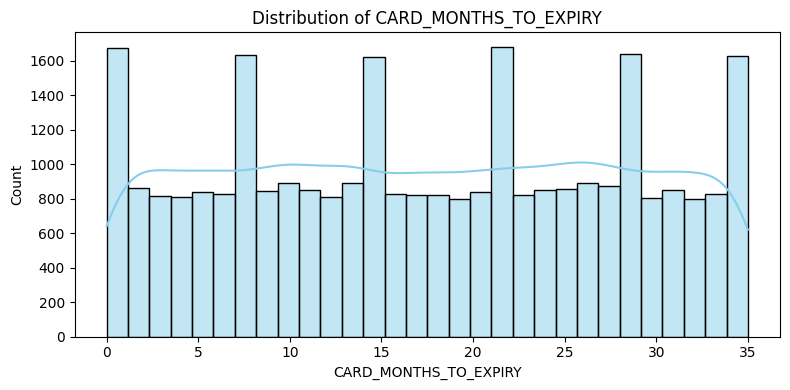

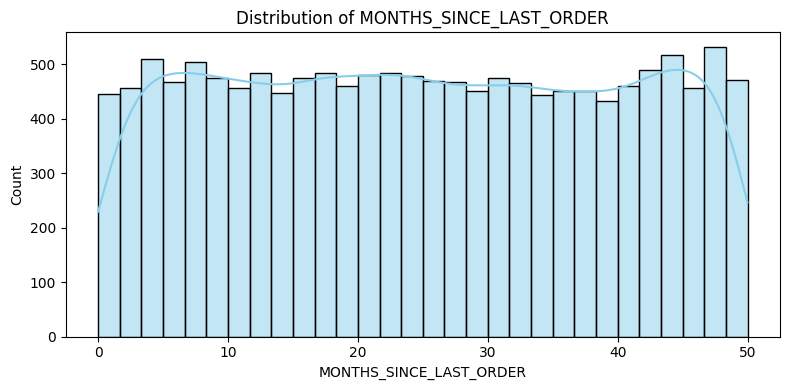

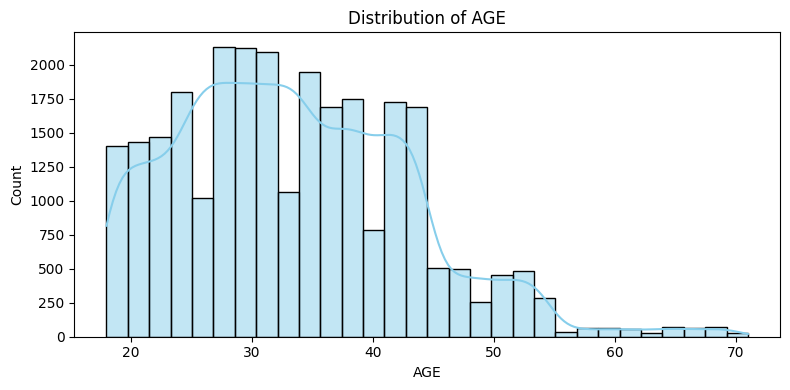

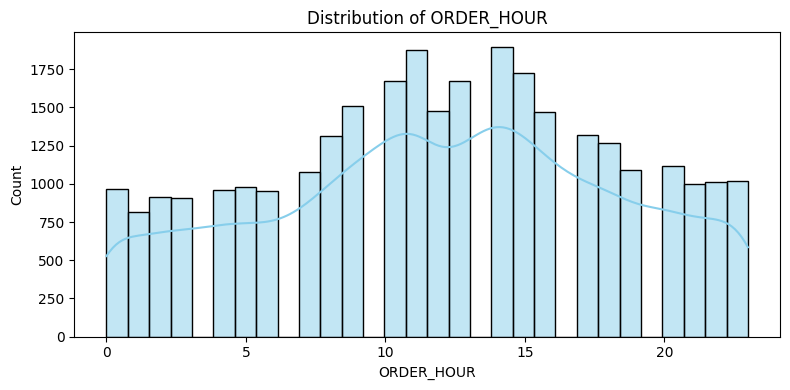

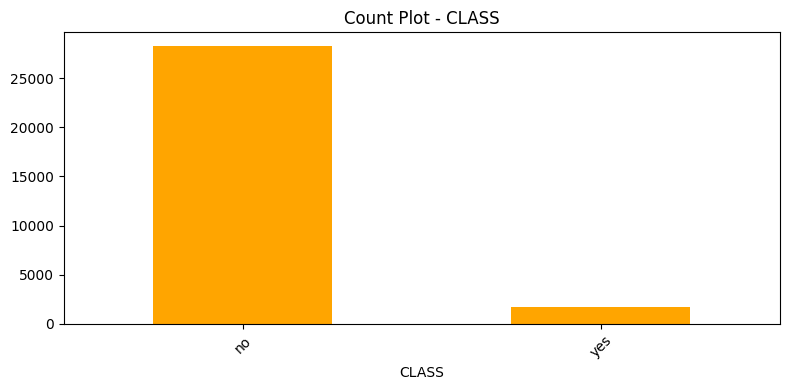

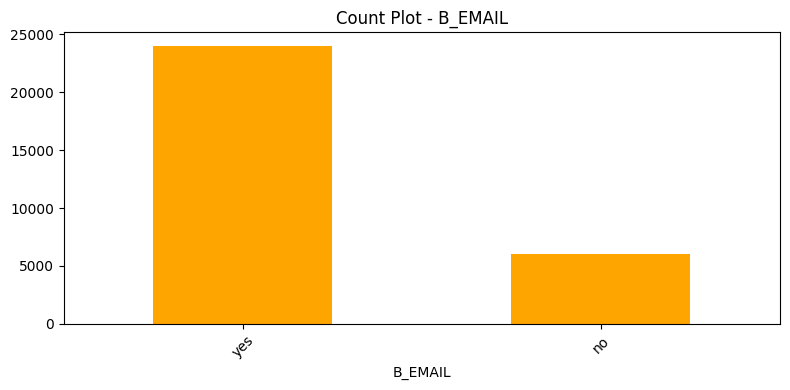

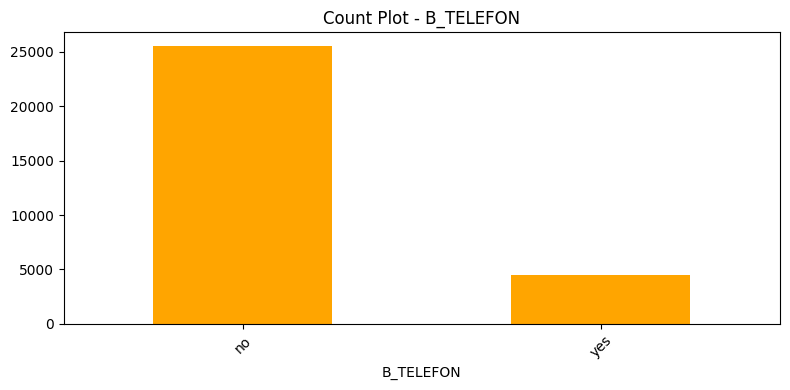

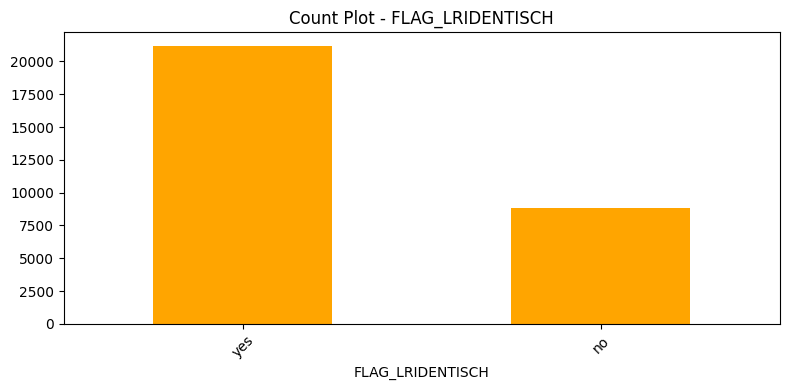

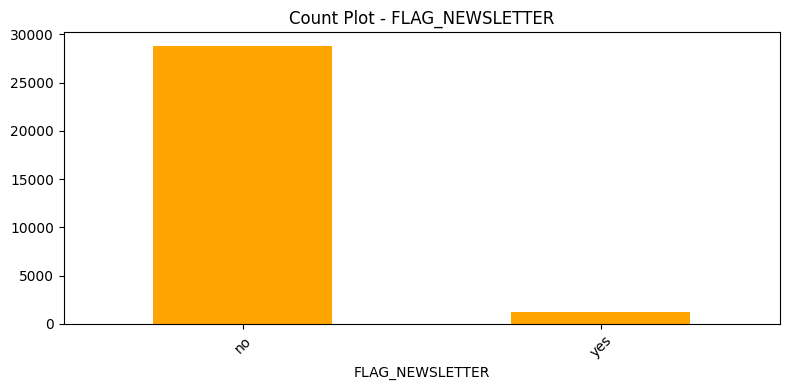

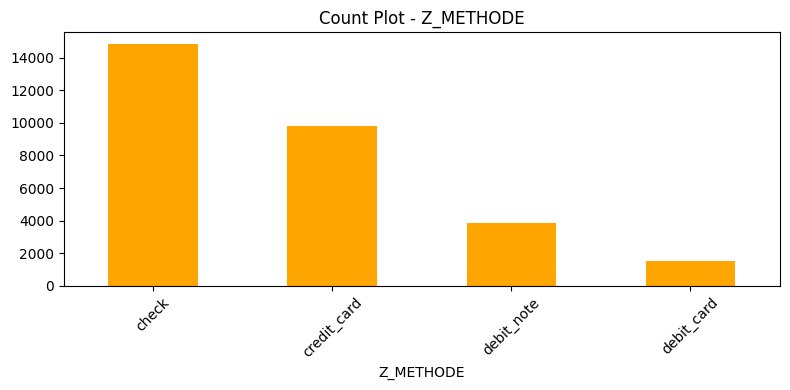

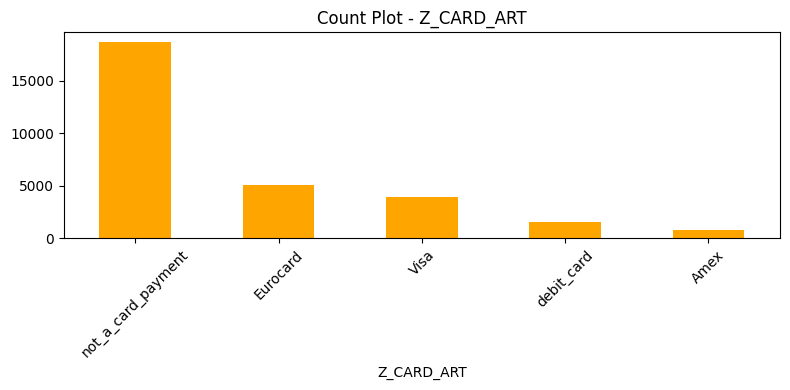

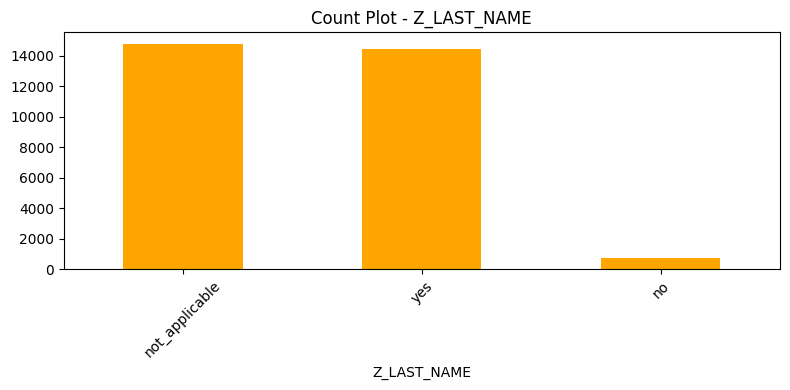

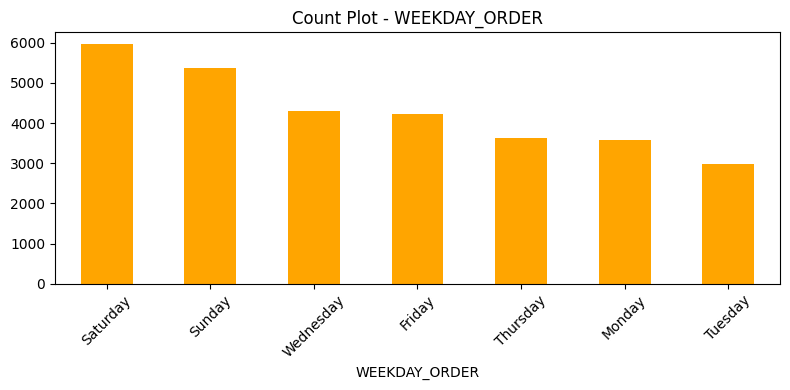

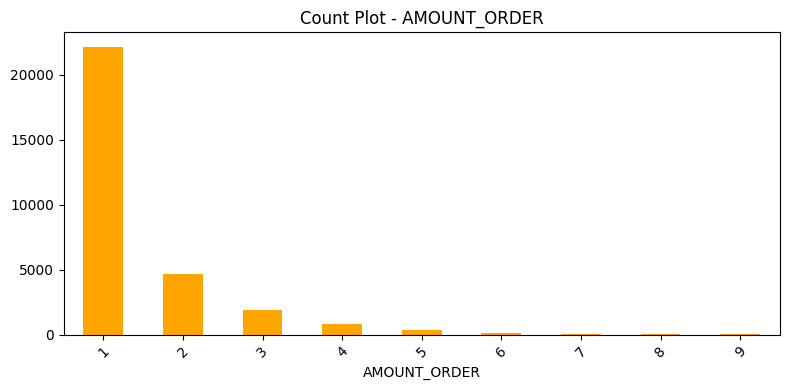

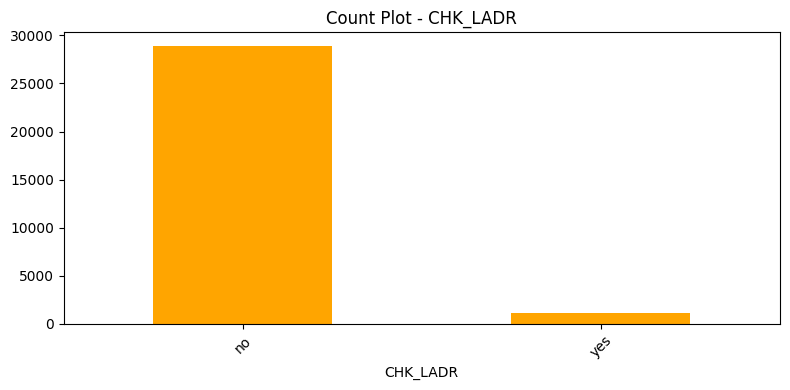

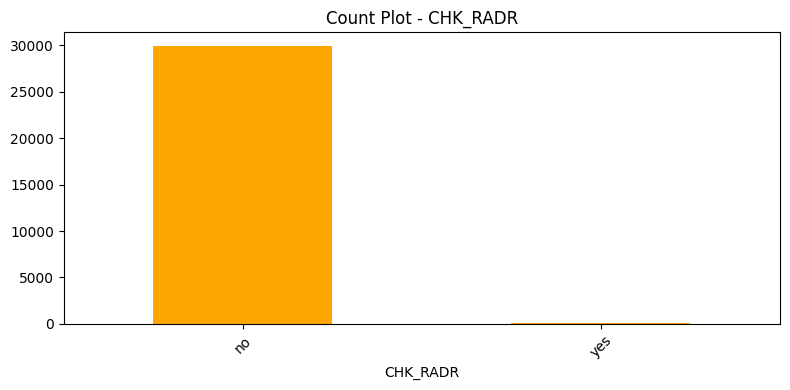

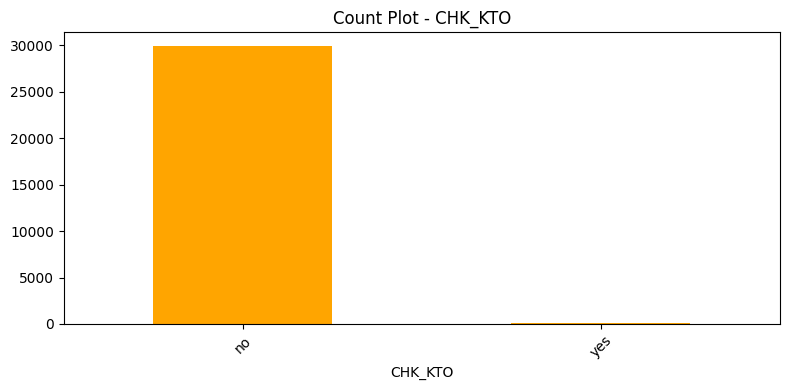

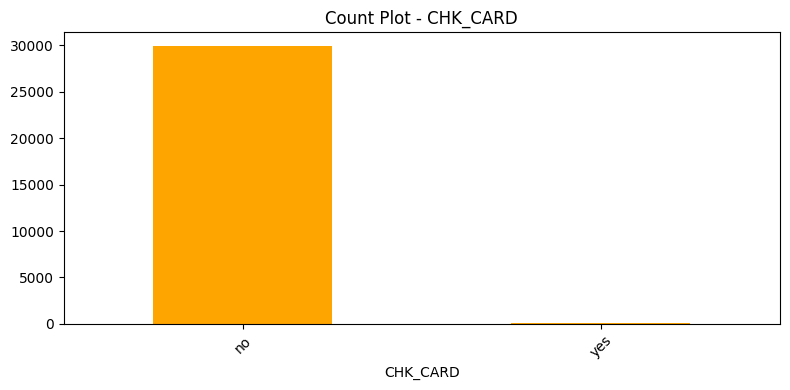

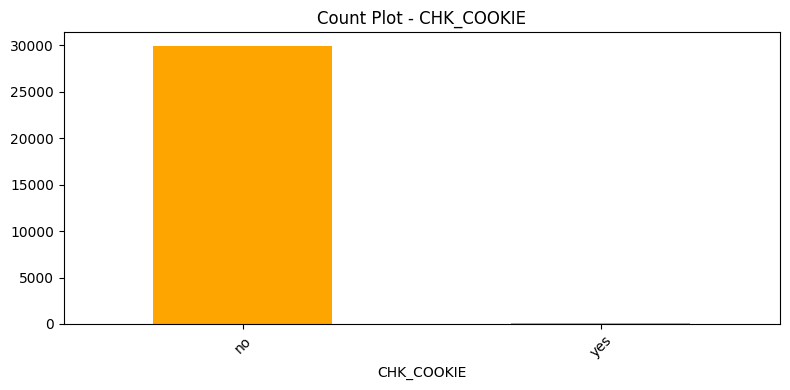

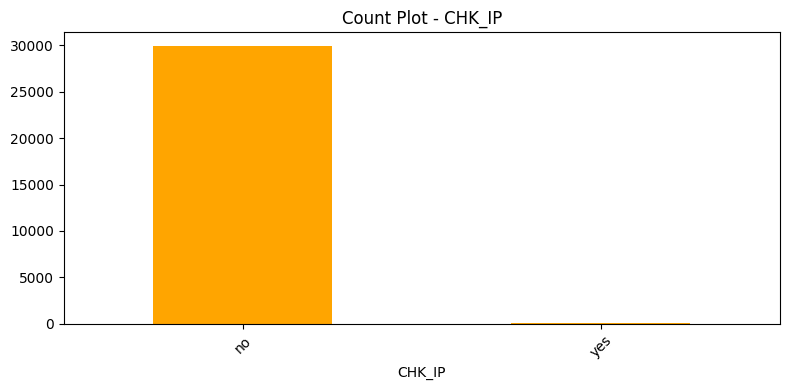

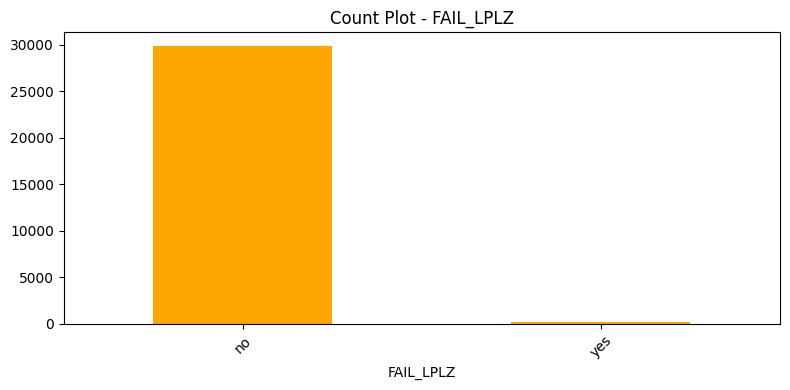

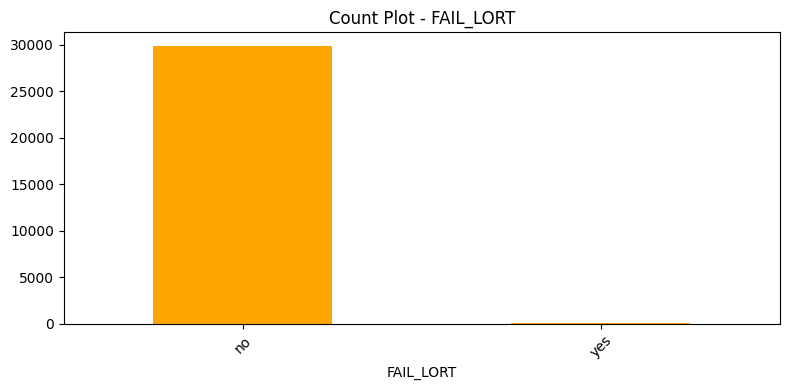

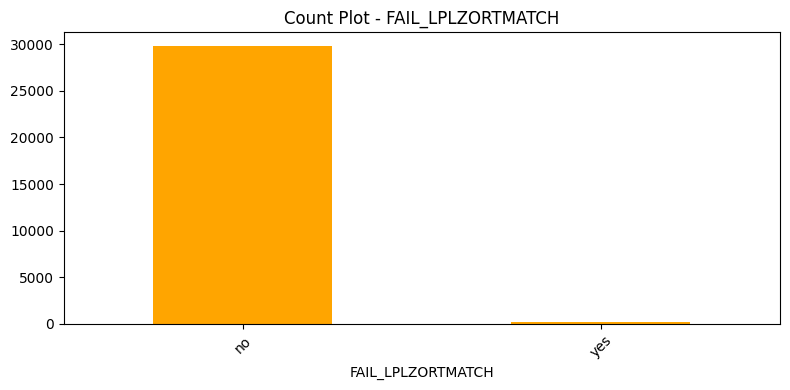

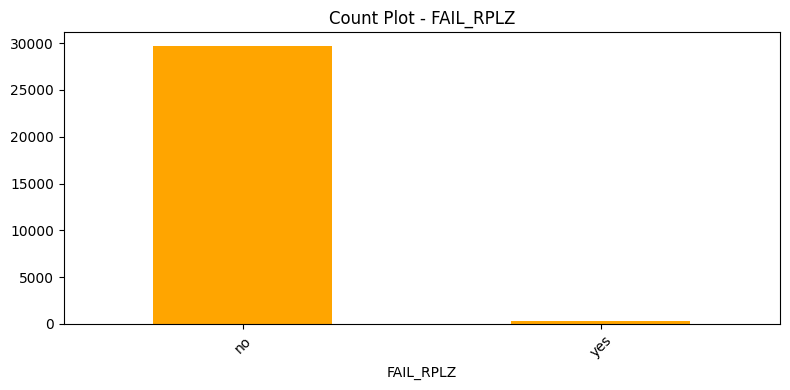

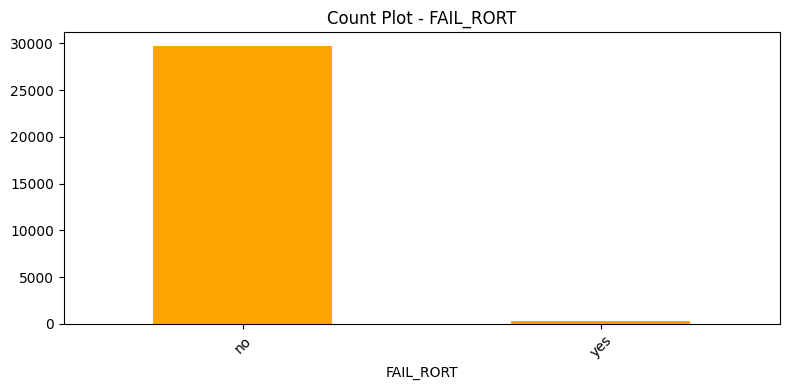

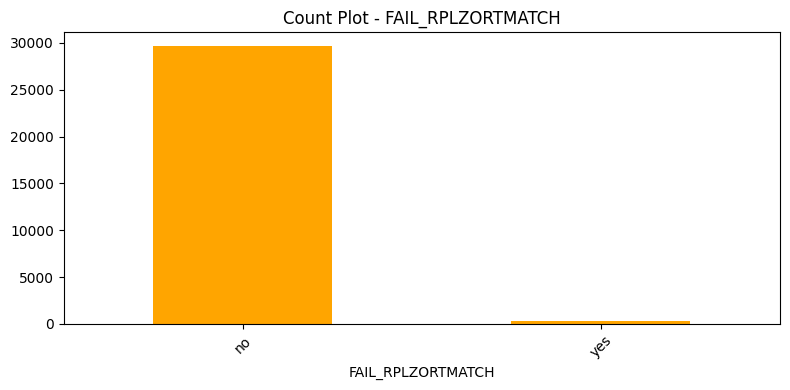

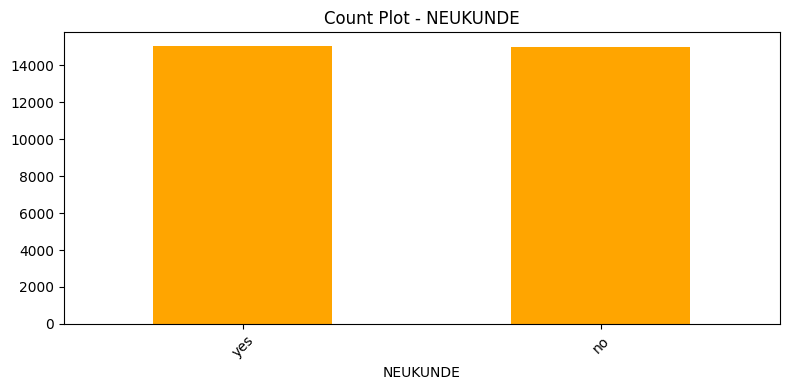

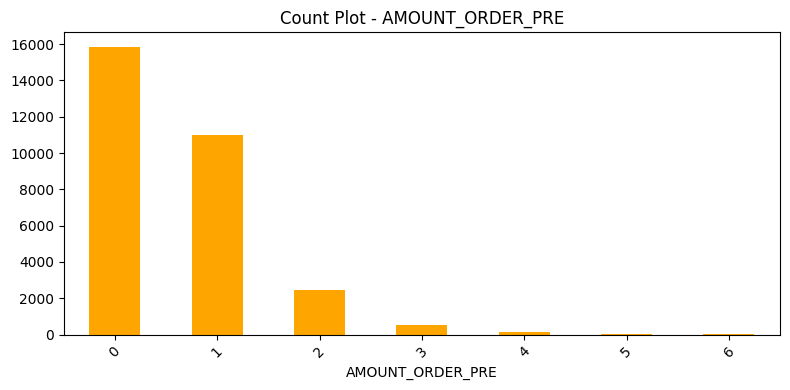

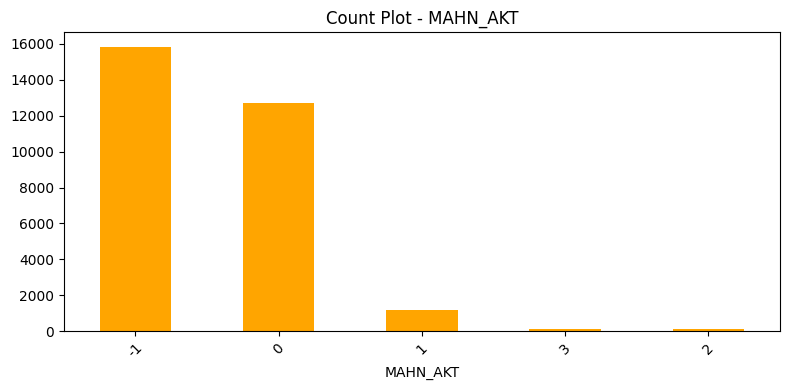

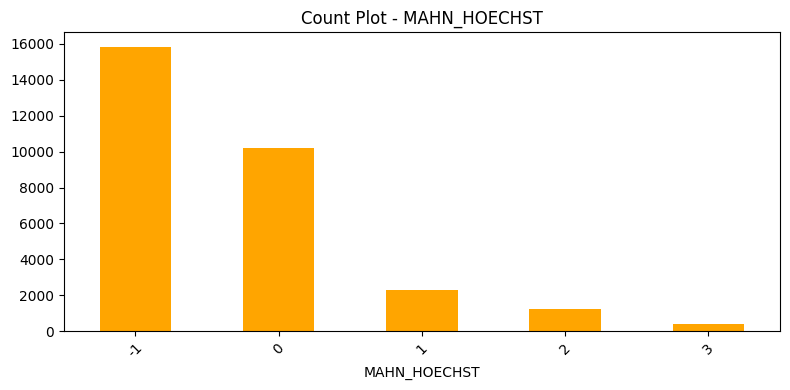

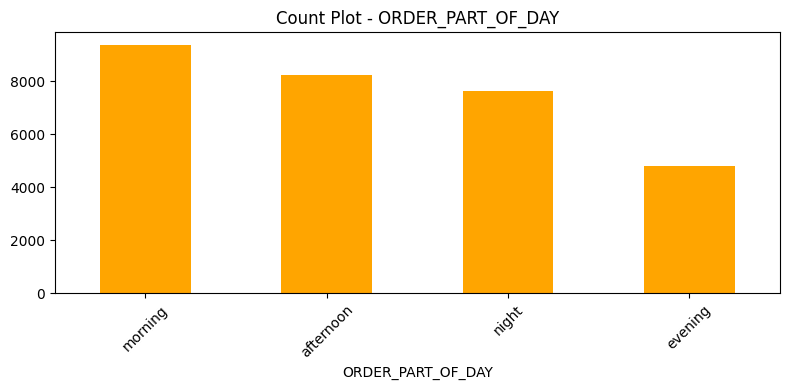

In [48]:
# Univariate Analysis
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include='object').columns

for col in num_cols:
  plt.figure(figsize=(8, 4))
  sns.histplot(df[col], kde=True, bins=30, color='skyblue')
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

for col in cat_cols:
  plt.figure(figsize=(8, 4))
  df[col].value_counts().plot(kind='bar', color='orange')
  plt.title(f"Count Plot - {col}")
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

/tmp/ipython-input-1493345030.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette='viridis')


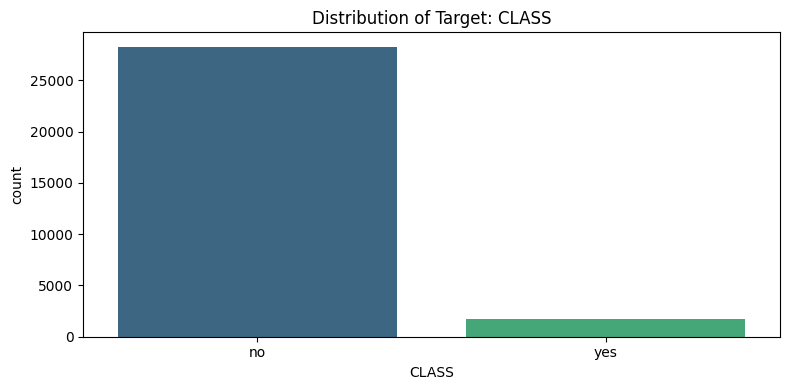

In [49]:
target='CLASS'
if target in df.columns:
  plt.figure(figsize=(8, 4))
  if df[target].dtype == 'object' or df[target].nunique() < 15:
    sns.countplot(x=target, data=df, palette='viridis')
  else:
    sns.histplot(df[target], kde=True, color='coral')
  plt.title(f"Distribution of Target: {target}")
  plt.tight_layout()
  plt.show()
else:
  print("⚠️ Target column not found.")


Tuning LogisticRegression...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best Parameters for LogisticRegression: {'classifier__C': 10, 'classifier__penalty': 'l2', 'preprocessor__num__imputer__strategy': 'mean'}
Accuracy: 0.942, Precision: 0.922, Recall: 0.942, F1 Score: 0.915
ROC-AUC: 0.736


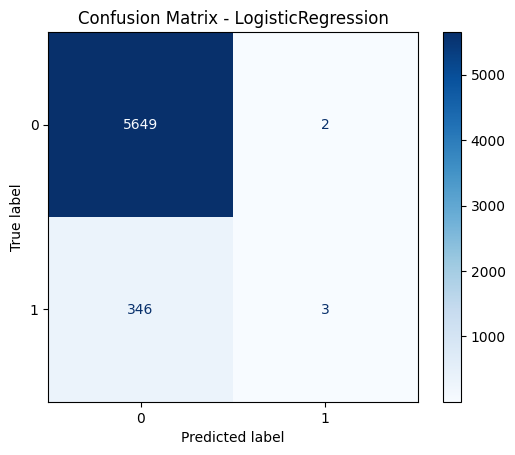

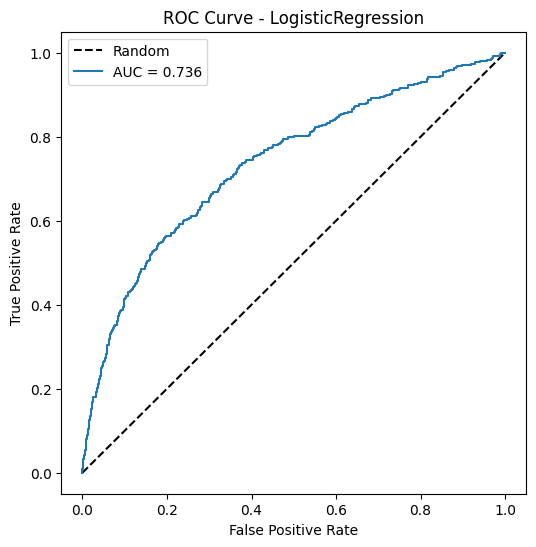


Tuning RandomForest...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for RandomForest: {'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}
Accuracy: 0.942, Precision: 0.887, Recall: 0.942, F1 Score: 0.914
ROC-AUC: 0.745


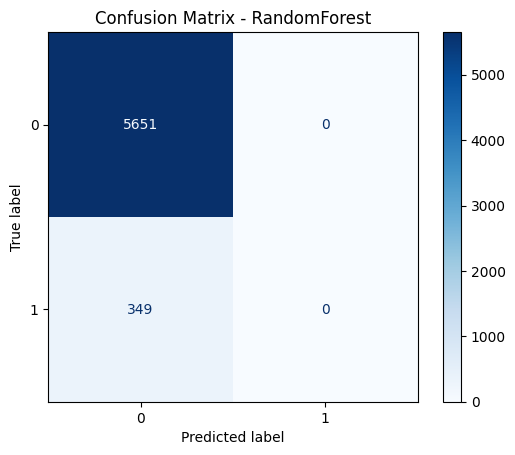

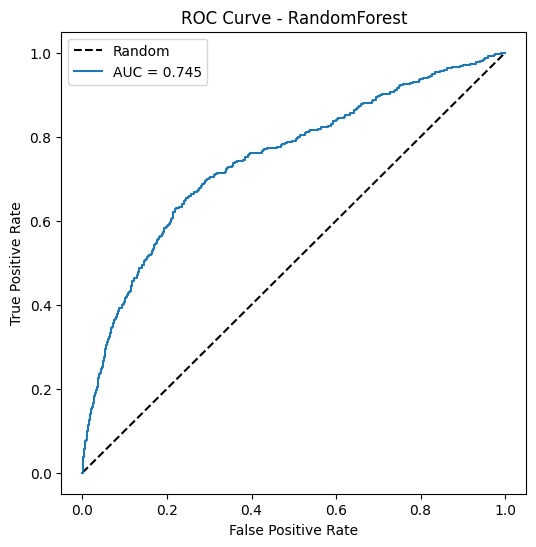


Tuning GradientBoosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for GradientBoosting: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy: 0.942, Precision: 0.909, Recall: 0.942, F1 Score: 0.914
ROC-AUC: 0.742


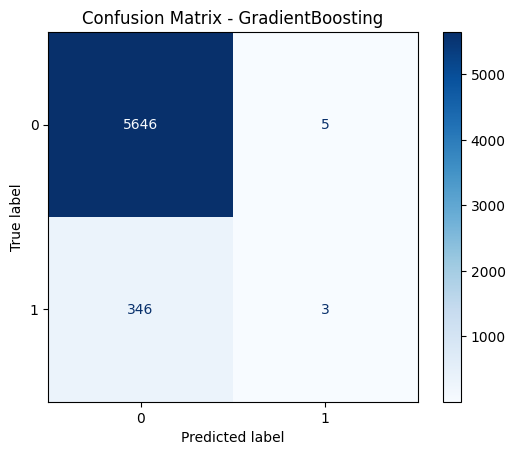

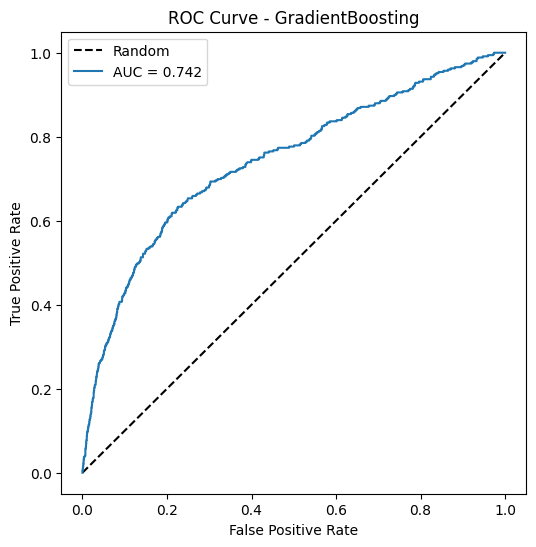


Tuning XGBClassifier...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters for XGBClassifier: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Accuracy: 0.942, Precision: 0.945, Recall: 0.942, F1 Score: 0.914
ROC-AUC: 0.749


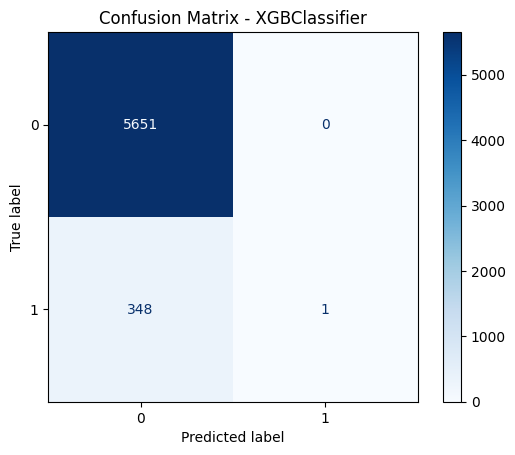

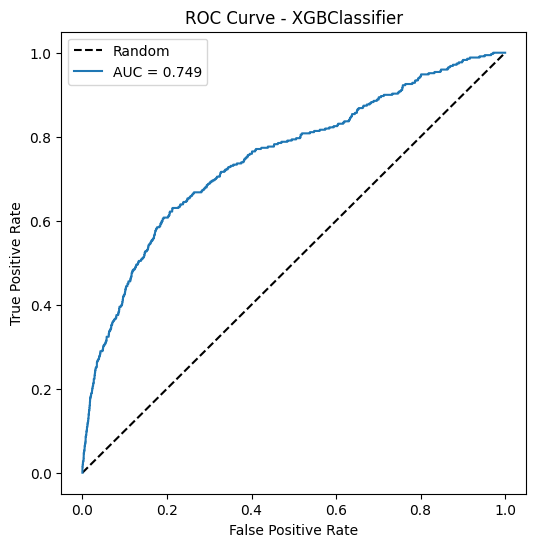


🎯 Best Overall Model: XGBClassifier with ROC_AUC = 0.749


['best_classification_model.pkl']

In [43]:
# ================== 4. TRAIN/TEST SPLIT ==================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 5. PREPROCESSING ==================
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'

)


# ================== 6. DEFINE MODELS AND PARAMETERS ==================
models_and_params = [
    {
        'name': 'LogisticRegression',
        'estimator': Pipeline([('preprocessor', preprocessor),
                               ('classifier', LogisticRegression(max_iter=1000, random_state=42, multi_class='auto', solver='lbfgs'))]),  #change 1
        'params': {
           'classifier__C': [0.01, 0.1, 1, 10],
           'classifier__penalty': ['l2'],
           'preprocessor__num__imputer__strategy': ['mean', 'median']
       }
    },
    {
        'name': 'RandomForest',
        'estimator': Pipeline([('preprocessor', preprocessor),
                               ('classifier', RandomForestClassifier(random_state=42))]),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [3, 5, 10],
            'preprocessor__num__imputer__strategy': ['mean', 'median']
        }
    },
    {
        'name': 'GradientBoosting',
        'estimator': Pipeline([('preprocessor', preprocessor),
                               ('classifier', GradientBoostingClassifier(random_state=42))]),
        'params': {
            'classifier__n_estimators': [100, 500],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5]
        }
    },
    {
        'name': 'XGBClassifier',
        'estimator': Pipeline([('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(eval_metric='logloss', random_state=42))]),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1],
            'classifier__max_depth': [3, 5, 10]
        }
    }
]

# ================== 7. TRAIN MODELS WITH GRIDSEARCHCV ==================
# ROC–AUC is used here because it evaluates how well the model ranks patients by risk
# without depending on a fixed classification threshold.

all_models_results = []
for model_dict in models_and_params:
    print(f"\nTuning {model_dict['name']}...")
    grid_search = GridSearchCV(estimator=model_dict['estimator'],
                               param_grid=model_dict['params'],
                               cv=3, n_jobs=-1, verbose=1,
                               scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # ================== 8. BASELINE PREDICTIONS (DEFAULT THRESHOLD = 0.5) ==================
    # At this stage, we evaluate the model using its default decision rule ==================
    y_pred = best_model.predict(X_test)

    # ================== 9.  BASELINE PERFORMANCE METRICS ==================
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


    # ================== 10. PROBABILITY SCORES FOR THRESHOLD-INDEPENDENT EVALUATION ==================
    # These probabilities are used for ROC analysis and AUC calculation

    y_scores = best_model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_scores)

    print(f"Best Parameters for {model_dict['name']}: {best_params}")
    print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1 Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    # ================== 9. STORE RESULTS ==================
    all_models_results.append({
        'name': model_dict['name'],
        'model': best_model,
        'best_params': best_params,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc})

    # ================== 11. CLASSIFICATION REPORT AND PLOT CONFUSION MATRIX AND ROC CURVE and AUC==================

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_dict["name"]}')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_dict["name"]}')
    plt.legend()
    plt.show()



# ================== 12. FIND BEST OVERALL MODEL ==================
best_overall = max(all_models_results, key=lambda x: x['roc_auc'])

print(f"\n🎯 Best Overall Model: {best_overall['name']} with ROC_AUC = {best_overall['roc_auc']:.3f}")

# ================== 13. SAVE THE BEST MODEL ==================
filename = 'best_classification_model.pkl'
joblib.dump(best_overall['model'], filename)